In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('oasis_longitudinal.csv')
data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'oasis_longitudinal.csv'

In [261]:
data.isnull().value_counts()

Subject ID  MRI ID  Group  Visit  MR Delay  M/F    Hand   Age    EDUC   SES    MMSE   CDR    eTIV   nWBV   ASF  
False       False   False  False  False     False  False  False  False  False  False  False  False  False  False    354
                                                                        True   False  False  False  False  False     17
                                                                               True   False  False  False  False      2
Name: count, dtype: int64

In [262]:
completeData = data.dropna()
completeData.shape

(354, 15)

In [263]:
completeData.isnull().value_counts()

Subject ID  MRI ID  Group  Visit  MR Delay  M/F    Hand   Age    EDUC   SES    MMSE   CDR    eTIV   nWBV   ASF  
False       False   False  False  False     False  False  False  False  False  False  False  False  False  False    354
Name: count, dtype: int64

In [264]:
encoder = LabelEncoder()
completeData['M/F'] = encoder.fit_transform(completeData['M/F']) 
completeData['Hand'] = encoder.fit_transform(completeData['Hand']) 

C:\Users\Nikunj_Rathore\AppData\Local\Temp\ipykernel_26568\2681362099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completeData['M/F'] = encoder.fit_transform(completeData['M/F'])
C:\Users\Nikunj_Rathore\AppData\Local\Temp\ipykernel_26568\2681362099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completeData['Hand'] = encoder.fit_transform(completeData['Hand'])


In [265]:
X = completeData.drop(columns = ['Subject ID', 'MRI ID', 'Group'], axis = 1)
Y = completeData['Group']

In [266]:
print(X)

     Visit  MR Delay  M/F  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        1         0    1     0   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        2       457    1     0   88    14  2.0  30.0  0.0  2004  0.681  0.876
5        1         0    0     0   88    18  3.0  28.0  0.0  1215  0.710  1.444
6        2       538    0     0   90    18  3.0  27.0  0.0  1200  0.718  1.462
7        1         0    1     0   80    12  4.0  28.0  0.0  1689  0.712  1.039
..     ...       ...  ...   ...  ...   ...  ...   ...  ...   ...    ...    ...
368      2       842    1     0   82    16  1.0  28.0  0.5  1693  0.694  1.037
369      3      2297    1     0   86    16  1.0  26.0  0.5  1688  0.675  1.040
370      1         0    0     0   61    13  2.0  30.0  0.0  1319  0.801  1.331
371      2       763    0     0   63    13  2.0  30.0  0.0  1327  0.796  1.323
372      3      1608    0     0   65    13  2.0  30.0  0.0  1333  0.801  1.317

[354 rows x 12 columns]


In [267]:
print(Y)

0      Nondemented
1      Nondemented
5      Nondemented
6      Nondemented
7      Nondemented
          ...     
368       Demented
369       Demented
370    Nondemented
371    Nondemented
372    Nondemented
Name: Group, Length: 354, dtype: object


In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.35, stratify = Y, random_state = 2)

In [269]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [270]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)

print("Accuracy on Ting Dataset: ", training_accuracy)

Accuracy on Ting Dataset:  0.7317073170731707


In [271]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)

print("Accuracy on Testing Dataset: ", testing_accuracy)

Accuracy on Testing Dataset:  0.7229437229437229


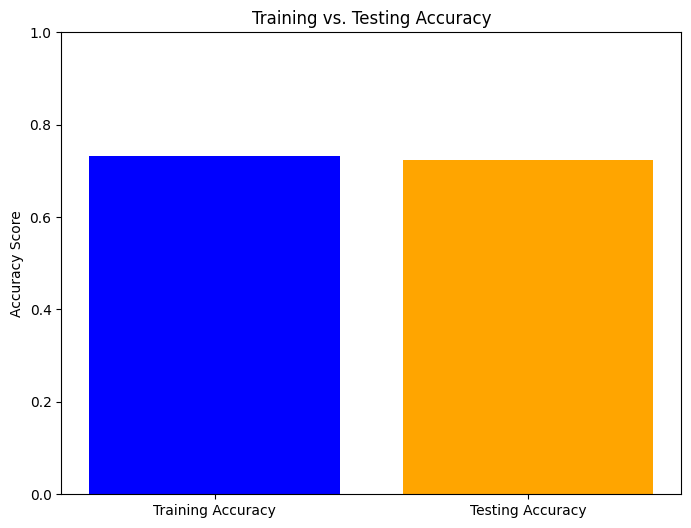

In [272]:
accuracies = [training_accuracy, testing_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy range is from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Training vs. Testing Accuracy')
plt.show()

In [275]:
#Building a predictive system
input_array = (2,736,1,0,80,12,3,17,1,1755,0.696,1.000)
numpy_array = np.asarray(input_array) 

reshape_array = numpy_array.reshape(1, -1)

prediction = model.predict(reshape_array)

print("Person is ", prediction[0])

Person is  Demented


C:\Users\Nikunj_Rathore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
